In [2]:
# Dataframe
import pandas as pd

# Array
import numpy as np
import itertools

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime

# text preprocessing
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import gensim
import re


import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load('en_core_web_sm')

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [4]:
df3 = pd.read_csv('./Reduced_Cleaned_Reviews_electronics_headphones.csv')

In [5]:
df3.head(3)

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,url,description,categories,product_title,price,...,pos_feedback,neg_feedback,rating_class,help_prop,clean_text,year,rating_class_num,token,review_length,review_length_bin
0,A1WYKNREHQ30KE,B00000JBHP,"A. Jones ""anjsmiles""",4,2011-01-10,http://ecx.images-amazon.com/images/I/41PssPkA...,NaN,"[['Electronics', 'Accessories & Supplies', 'Au...",Yamaha RH1C Portable Headphones,9.86,...,0,0,good,0.0,great headphones nice headphones no noise esca...,2011,1,"['great', 'headphones', 'nice', 'headphones', ...",55,"(0.0, 100.0]"
1,A24PTVSZSM8968,B00000JBHP,Amazon Customer,4,2013-03-02,http://ecx.images-amazon.com/images/I/41PssPkA...,NaN,"[['Electronics', 'Accessories & Supplies', 'Au...",Yamaha RH1C Portable Headphones,9.86,...,0,1,good,0.0,pretty nice headphones nice feature nice shape...,2013,1,"['pretty', 'nice', 'headphones', 'nice', 'feat...",102,"(100.0, 200.0]"
2,A4DZOJ79D9BXE,B00000JBHP,Angelina Lotulelei,4,2013-06-18,http://ecx.images-amazon.com/images/I/41PssPkA...,NaN,"[['Electronics', 'Accessories & Supplies', 'Au...",Yamaha RH1C Portable Headphones,9.86,...,0,0,good,0.0,serve purpose well enough not exactly noise ca...,2013,1,"['serve', 'purpose', 'well', 'enough', 'not', ...",91,"(0.0, 100.0]"


In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviewer_id        15000 non-null  object 
 1   product_id         15000 non-null  object 
 2   reviewer_name      15000 non-null  object 
 3   rating             15000 non-null  int64  
 4   unix_review_time   15000 non-null  object 
 5   url                15000 non-null  object 
 6   description        10825 non-null  object 
 7   categories         15000 non-null  object 
 8   product_title      15000 non-null  object 
 9   price              15000 non-null  float64
 10  related            15000 non-null  object 
 11  brand_name         15000 non-null  object 
 12  review_text        15000 non-null  object 
 13  pos_feedback       15000 non-null  int64  
 14  neg_feedback       15000 non-null  int64  
 15  rating_class       15000 non-null  object 
 16  help_prop          150

In [7]:
# Drop unnecessary columns
df4 = df3.drop(['rating','reviewer_name','unix_review_time','url','description','categories','product_title','price','related','brand_name','pos_feedback', 'neg_feedback','help_prop','rating_class_num','review_length','review_length_bin'], axis=1)

In [8]:
df4.head()

,reviewer_id,product_id,review_text,rating_class,clean_text,year,token
0,A1WYKNREHQ30KE,B00000JBHP,Great Headphones Nice headphones. No noise esc...,good,great headphones nice headphones no noise esca...,2011,"['great', 'headphones', 'nice', 'headphones', ..."
1,A24PTVSZSM8968,B00000JBHP,Pretty nice These headphones have some nice fe...,good,pretty nice headphones nice feature nice shape...,2013,"['pretty', 'nice', 'headphones', 'nice', 'feat..."
2,A4DZOJ79D9BXE,B00000JBHP,It serves it purpose well enough They are not ...,good,serve purpose well enough not exactly noise ca...,2013,"['serve', 'purpose', 'well', 'enough', 'not', ..."
3,A104VHQ06KFLDT,B00000JBHP,Inexpensive yet descent sound This headset is ...,good,inexpensive yet descent sound headset inexpens...,2010,"['inexpensive', 'yet', 'descent', 'sound', 'he..."
4,AGI34T5QZWBBC,B00000JBHP,Very happy! I purchased these headphones to go...,good,happy purchase headphones go wmy electric pian...,2014,"['happy', 'purchase', 'headphones', 'go', 'wmy..."


In [9]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviewer_id   15000 non-null  object
 1   product_id    15000 non-null  object
 2   review_text   15000 non-null  object
 3   rating_class  15000 non-null  object
 4   clean_text    15000 non-null  object
 5   year          15000 non-null  int64 
 6   token         15000 non-null  object
dtypes: int64(1), object(6)
memory usage: 820.4+ KB


Natural Language Processing 

Data Preprocessing<br/>
Separating Response Variable and Feature 

In [10]:
df4['rating_class'] = df4['rating_class'].apply(lambda x: 0 if x == 'bad' else 1)

In [11]:
# Splitting the Data Set into Train and Test Sets
X = df4['clean_text']
y = df4['rating_class']

Splitting Dataset into Train and Test

In [12]:
# Splitting Dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(11250,)
Test Set Shape		:(3750,)


Selecting the Right Evaluation Metric

Confusion Matrix Plot

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [15]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Bad','Good'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

Modelling

CountVectorizer - Bag of Words

In [16]:
# Create the word vector with CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [17]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 20589


In [18]:
vocab = count_vect.get_feature_names()

In [19]:
pd.DataFrame(count_vect_train, columns = vocab).head()

,______,_front_,_hate_,_if_,_just,_o,_they,aa,aaa,aaaa,...,zoom,zoro,zound,zoundplug,zumos,zune,zunes,zunewill,zx,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Function for applying different algorithms 

In [20]:
def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

Dummy Classifier

In [21]:
clf = DummyClassifier(strategy = 'stratified', random_state =42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

f1 score: 0.6868779777697749


In [22]:
#Generate Classification Report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.19      0.18      0.19       728
           1       0.80      0.81      0.81      3022

    accuracy                           0.69      3750
   macro avg       0.50      0.50      0.50      3750
weighted avg       0.69      0.69      0.69      3750



<b>CountVectorizer Bag of Words</b>

Model 1 : <br/>
Logistic Regression with CountVectorizer

In [23]:
# modeling function for logistic regression with countvectorizer called
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred

f1 score: 0.8918869119087388


In [24]:
#Classification Report
print(classification_report(y_test, y_pred_cv_logreg))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       728
           1       0.95      0.92      0.93      3022

    accuracy                           0.89      3750
   macro avg       0.82      0.85      0.83      3750
weighted avg       0.90      0.89      0.89      3750



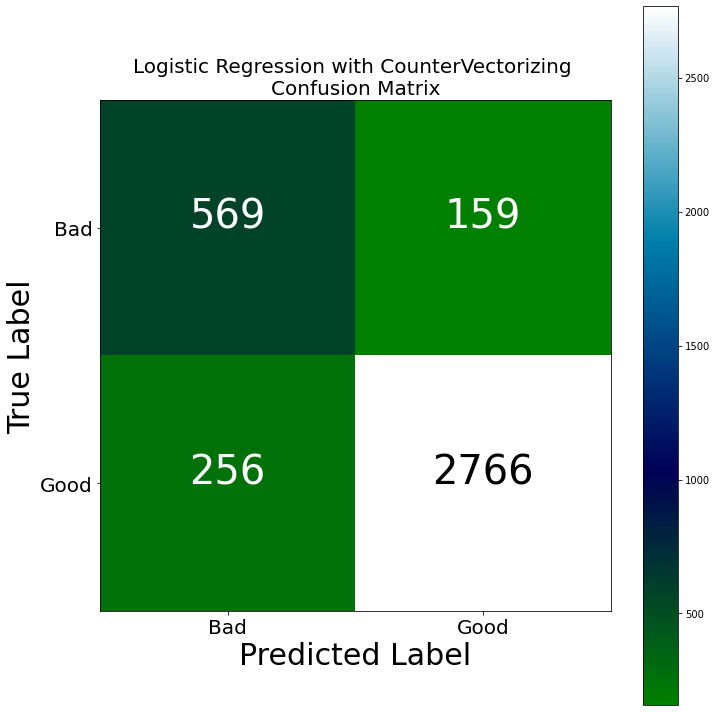

In [27]:
# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")

Model 2: <br/>
Random Forest with CountVectorizer

In [28]:
#Modeling function for random forest classifier with countvectorizer
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42))
# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

f1 score: 0.8163338496583145


In [30]:
#Classification Report
print(classification_report(y_test, y_pred_cv_rf))

              precision    recall  f1-score   support

           0       0.98      0.25      0.40       728
           1       0.85      1.00      0.92      3022

    accuracy                           0.85      3750
   macro avg       0.91      0.63      0.66      3750
weighted avg       0.87      0.85      0.82      3750



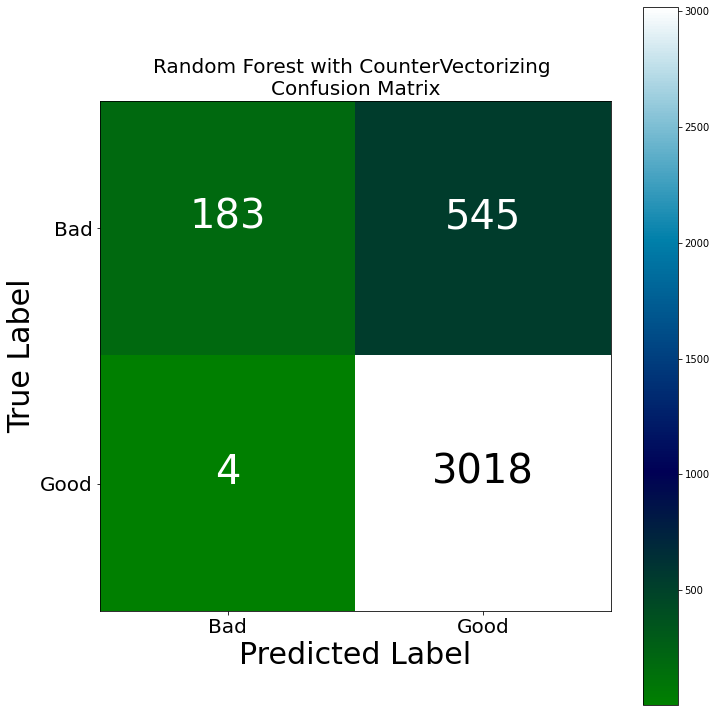

In [31]:
# Print confusion matrix for random forest classifier with countVectorizer
disp_confusion_matrix(y_pred_cv_rf, "Random Forest")

Model 3: <br/>
Naive Bayes with CountVectorizer

In [32]:
# Call the modeling function for naive bayes with countvectorizer and print f1 score
modeling(MultinomialNB())
# Assign y_pred to a variable for further process
y_pred_cv_nb = y_pred

f1 score: 0.8826110843737032


In [33]:
#Classification Report
print(classification_report(y_test, y_pred_cv_nb))

              precision    recall  f1-score   support

           0       0.77      0.60      0.68       728
           1       0.91      0.96      0.93      3022

    accuracy                           0.89      3750
   macro avg       0.84      0.78      0.80      3750
weighted avg       0.88      0.89      0.88      3750



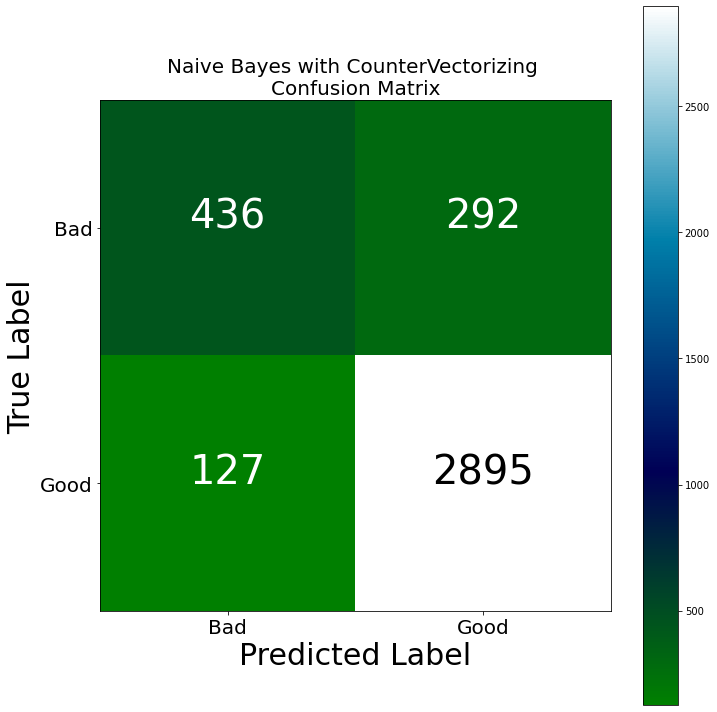

In [34]:
# Print confusion matrix for naive bayes with countVectorizer
disp_confusion_matrix(y_pred_cv_nb, "Naive Bayes")

Model 4: <br/>
XGBoost with CountVectorizer

In [35]:
# Call the modeling function for XGBoost with countvectorizer and print f1 score
modeling(XGBClassifier())

# Assign y_pred to a variable for further process
y_pred_cv_xgb = y_pred

f1 score: 0.8920796235879777


In [36]:
#Classification Report
print(classification_report(y_test, y_pred_cv_xgb))

              precision    recall  f1-score   support

           0       0.84      0.59      0.69       728
           1       0.91      0.97      0.94      3022

    accuracy                           0.90      3750
   macro avg       0.88      0.78      0.82      3750
weighted avg       0.90      0.90      0.89      3750



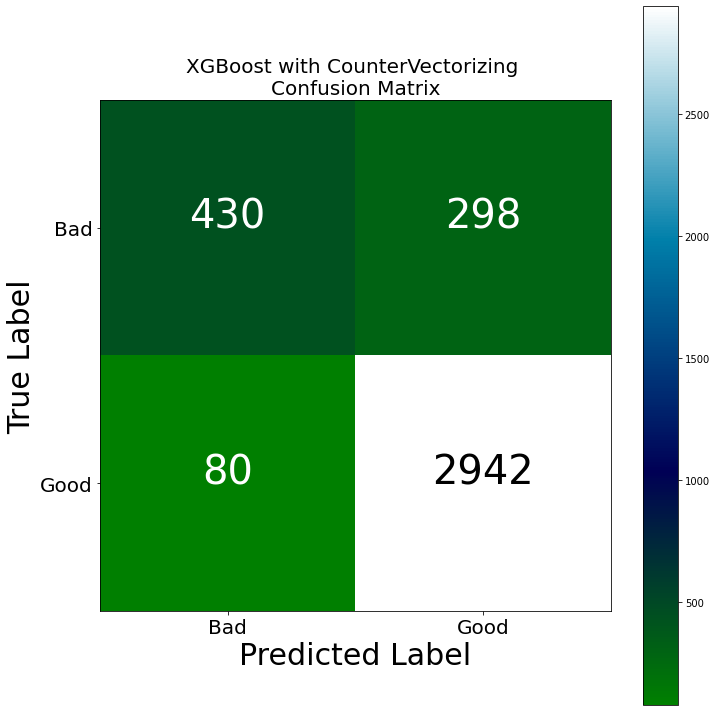

In [37]:
# Print confusion matrix for gradient boosting with countVectorizer
disp_confusion_matrix(y_pred_cv_xgb, "XGBoost")

Model 5: <br/>
Catboost with CountVectorizer

In [38]:
#modeling function for CatBoost with countvectorizer
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, 
                            depth=2, loss_function='Logloss'))
# Assign y_pred to a variable for further process
y_pred_cv_catboost = y_pred

0:	learn: 0.4660862	total: 231ms	remaining: 22.8s
1:	learn: 0.4203521	total: 258ms	remaining: 12.6s
2:	learn: 0.3977094	total: 282ms	remaining: 9.12s
3:	learn: 0.3748799	total: 303ms	remaining: 7.28s
4:	learn: 0.3568564	total: 326ms	remaining: 6.19s
5:	learn: 0.3480966	total: 347ms	remaining: 5.44s
6:	learn: 0.3401747	total: 401ms	remaining: 5.32s
7:	learn: 0.3320440	total: 423ms	remaining: 4.86s
8:	learn: 0.3265604	total: 442ms	remaining: 4.47s
9:	learn: 0.3210769	total: 465ms	remaining: 4.18s
10:	learn: 0.3141469	total: 488ms	remaining: 3.94s
11:	learn: 0.3084664	total: 507ms	remaining: 3.72s
12:	learn: 0.3033491	total: 529ms	remaining: 3.54s
13:	learn: 0.2980684	total: 550ms	remaining: 3.38s
14:	learn: 0.2943921	total: 629ms	remaining: 3.57s
15:	learn: 0.2909196	total: 656ms	remaining: 3.44s
16:	learn: 0.2865929	total: 676ms	remaining: 3.3s
17:	learn: 0.2825607	total: 696ms	remaining: 3.17s
18:	learn: 0.2797885	total: 718ms	remaining: 3.06s
19:	learn: 0.2764643	total: 737ms	remainin

In [39]:
#Classification Report
print(classification_report(y_test, y_pred_cv_catboost))

              precision    recall  f1-score   support

           0       0.83      0.58      0.69       728
           1       0.91      0.97      0.94      3022

    accuracy                           0.90      3750
   macro avg       0.87      0.78      0.81      3750
weighted avg       0.89      0.90      0.89      3750



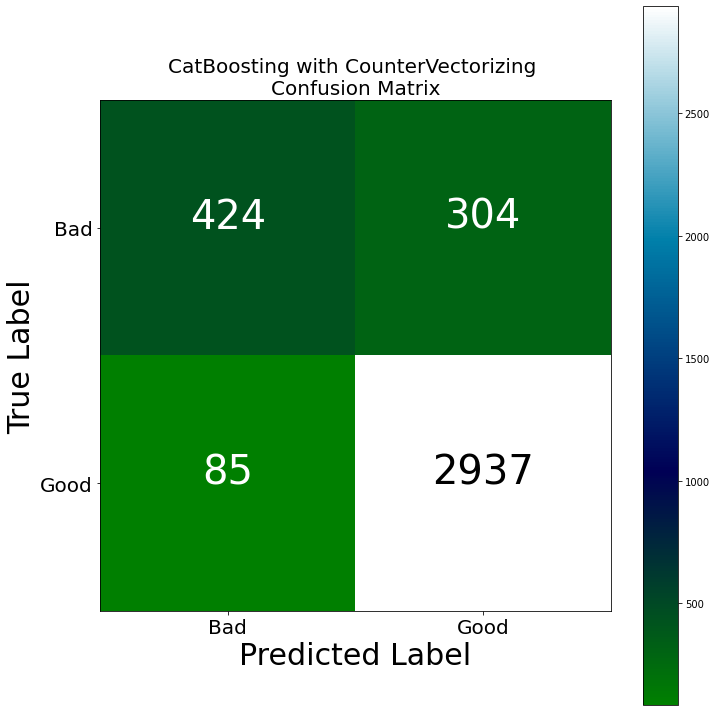

In [40]:
# Print confusion matrix for CatBoost with countVectorizer
disp_confusion_matrix(y_pred_cv_catboost, "CatBoosting")

<b>Comparing models with CountVectorizer</b>

In [41]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['bad', 'good', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [42]:
def comparison_table(y_preds, labels):    
    # empty list for collecting dataframes
    frames_tv = [] 
    # list for y_preds
    y_preds_tv = y_preds
    # list for labels
    labels_tv = labels  
    vector_tv = 'CountVect'
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)
    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

Function for F1 score plotting

In [66]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    sns.set_palette('bright')
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

Algorithms comparison with CountVectorizer

In [68]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_cv_rf, y_pred_cv_nb, y_pred_cv_xgb, y_pred_cv_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [69]:
df_tv2

precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.889333 bad       0.689697  0.781593  0.732775   
                                  good      0.945641  0.915288  0.930217   
                                  average   0.895954  0.889333  0.891887   
           Random Forest 0.853600 bad       0.978610  0.251374  0.400000   
                                  good      0.847039  0.998676  0.916629   
                                  average   0.872581  0.853600  0.816334   
           Naive Bayes   0.888267 bad       0.774423  0.598901  0.675445   
                                  good      0.908378  0.957975  0.932517   
                                  average   0.882373  0.888267  0.882611   
           XGBoost       0.899200 bad       0.843137  0.590659  0.694669   
                                  good      0.908025  0.973527  0.939636   
                                  average   0.895428  0.899200  0.892080   
           CatBoost      0.896267 bad       0.833006  0.582418  0.685530   
                                  good      0.906202  0.971873  0.937889   
                                  average   0.891992  0.896267  0.888898   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.889333 bad        728.0  
                                  good      3022.0  
                                  average   3750.0  
           Random Forest 0.853600 bad        728.0  
                                  good      3022.0  
                                  average   3750.0  
           Naive Bayes   0.888267 bad        728.0  
                                  good      3022.0  
                                  average   3750.0  
           XGBoost       0.899200 bad        728.0  
                                  good      3022.0  
                                  average   3750.0  
           CatBoost      0.896267 bad        728.0  
                                  good      3022.0  
                                  average   3750.0

Average F1 scores across all models with CountVectorizer

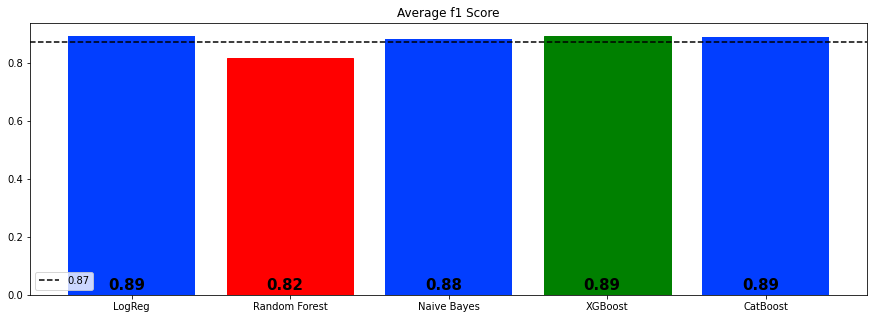

In [70]:
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

<b>TF-IDF(Term Frequency,Inverse Document Frequency) Bag of Words</b>

In [47]:
# Create the word vector with TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)
tfidf_vect_test = tfidf_vect_test.toarray()

Model 1: <br/>
Logistic Regression with TF-IDF

In [48]:
#Modeling function for logistic regression with TF-IDF 
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            tfidf_vect_train, tfidf_vect_test)
# Assign y_pred to a variable for further process
y_pred_tfidf_logreg = y_pred

f1 score: 0.8705264621240367


In [49]:
#Classification Report
print(classification_report(y_test, y_pred_tfidf_logreg))

              precision    recall  f1-score   support

           0       0.60      0.86      0.71       728
           1       0.96      0.86      0.91      3022

    accuracy                           0.86      3750
   macro avg       0.78      0.86      0.81      3750
weighted avg       0.89      0.86      0.87      3750



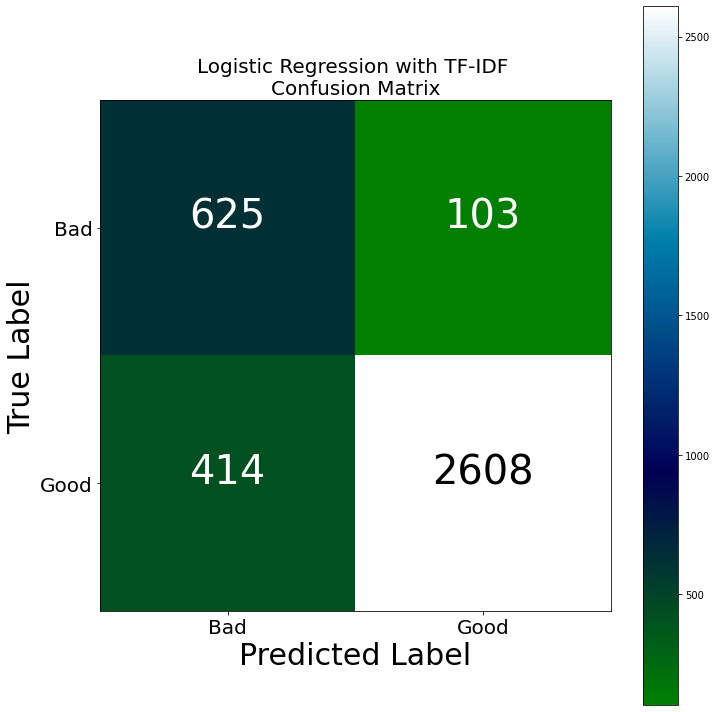

In [50]:
#Confusion Matrix
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "TF-IDF")

Model 2: <br/>
Random Forest with TF-IDF

In [51]:
# Call the modeling function for random forest classifier with TF-IDF and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         tfidf_vect_train, tfidf_vect_test)
# Assign y_pred to a variable for further process
y_pred_tfidf_rf = y_pred

f1 score: 0.8009663805257139


In [52]:
#Classification Report
print(classification_report(y_test, y_pred_tfidf_rf))

              precision    recall  f1-score   support

           0       0.99      0.20      0.34       728
           1       0.84      1.00      0.91      3022

    accuracy                           0.85      3750
   macro avg       0.91      0.60      0.63      3750
weighted avg       0.87      0.85      0.80      3750



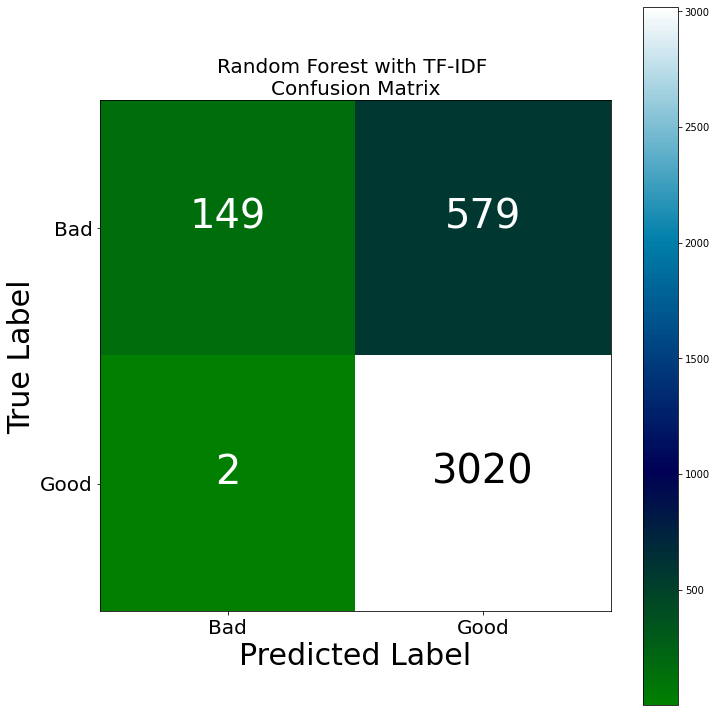

In [53]:
#Confusion Matrix
disp_confusion_matrix(y_pred_tfidf_rf, "Random Forest", "TF-IDF")

Model 3: <br/>
Naive Bayes with TF-IDF

In [54]:
# Call the modeling function for naive bayes with TF-IDF and print f1 score
modeling(MultinomialNB(), tfidf_vect_train, tfidf_vect_test)
# Assign y_pred to a variable for further process
y_pred_tfidf_nb = y_pred

f1 score: 0.7198736345736547


In [55]:
#Classification Report
print(classification_report(y_test, y_pred_tfidf_nb))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       728
           1       0.81      1.00      0.89      3022

    accuracy                           0.81      3750
   macro avg       0.90      0.50      0.45      3750
weighted avg       0.84      0.81      0.72      3750



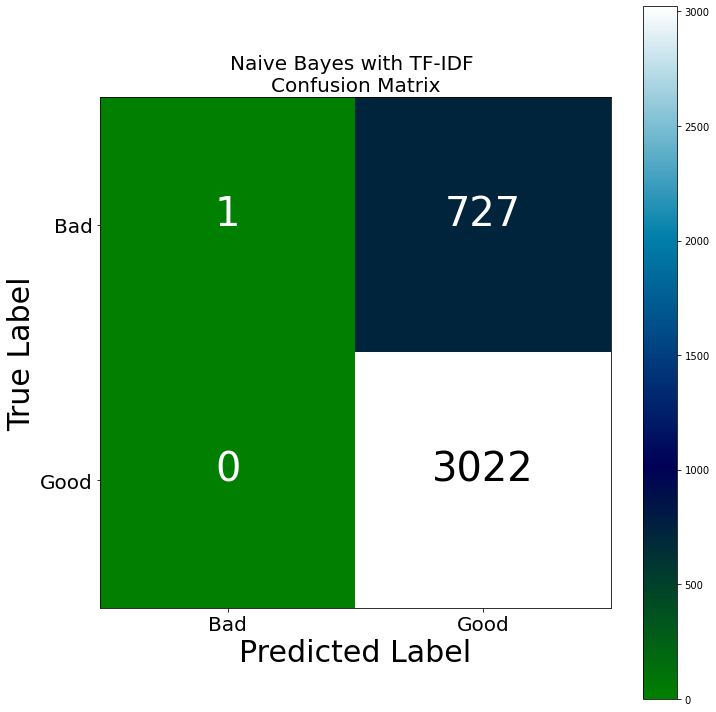

In [56]:
#Confusion Matrix
disp_confusion_matrix(y_pred_tfidf_nb, "Naive Bayes", "TF-IDF")

Model 4: <br/>
XGBoost with TF-IDF

In [57]:
modeling(XGBClassifier(), tfidf_vect_train, tfidf_vect_test)
y_pred_tfidf_xgb = y_pred

f1 score: 0.892816398538245


In [58]:
#Classification Report
print(classification_report(y_test, y_pred_tfidf_xgb))

              precision    recall  f1-score   support

           0       0.85      0.59      0.70       728
           1       0.91      0.97      0.94      3022

    accuracy                           0.90      3750
   macro avg       0.88      0.78      0.82      3750
weighted avg       0.90      0.90      0.89      3750



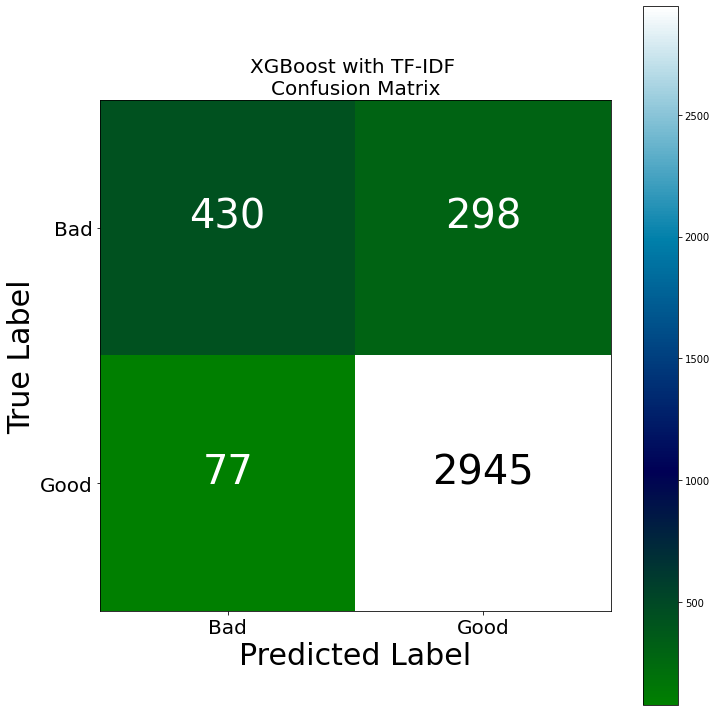

In [59]:
#Confusion Matrix
disp_confusion_matrix(y_pred_tfidf_xgb, "XGBoost", "TF-IDF")

Model 5: <br/>
Catboost with TF-IDF

In [60]:
# Call the modeling function for Catboost with TF-IDF
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, depth=2, 
                            loss_function='Logloss'), tfidf_vect_train, tfidf_vect_test)
# Assign y_pred to a variable for further process
y_pred_tfidf_catboost = y_pred

0:	learn: 0.4659691	total: 67.4ms	remaining: 6.67s
1:	learn: 0.4181725	total: 117ms	remaining: 5.72s
2:	learn: 0.3959117	total: 143ms	remaining: 4.62s
3:	learn: 0.3761289	total: 168ms	remaining: 4.02s
4:	learn: 0.3658570	total: 194ms	remaining: 3.68s
5:	learn: 0.3548688	total: 218ms	remaining: 3.42s
6:	learn: 0.3452893	total: 244ms	remaining: 3.24s
7:	learn: 0.3339832	total: 271ms	remaining: 3.12s
8:	learn: 0.3275234	total: 298ms	remaining: 3.01s
9:	learn: 0.3187897	total: 324ms	remaining: 2.92s
10:	learn: 0.3130142	total: 352ms	remaining: 2.85s
11:	learn: 0.3053260	total: 378ms	remaining: 2.77s
12:	learn: 0.2996124	total: 404ms	remaining: 2.7s
13:	learn: 0.2932602	total: 430ms	remaining: 2.64s
14:	learn: 0.2889111	total: 456ms	remaining: 2.58s
15:	learn: 0.2832802	total: 480ms	remaining: 2.52s
16:	learn: 0.2799115	total: 508ms	remaining: 2.48s
17:	learn: 0.2760875	total: 538ms	remaining: 2.45s
18:	learn: 0.2715152	total: 565ms	remaining: 2.41s
19:	learn: 0.2667361	total: 592ms	remaini

In [61]:
#Classification Report
print(classification_report(y_test, y_pred_tfidf_catboost))

              precision    recall  f1-score   support

           0       0.81      0.59      0.69       728
           1       0.91      0.97      0.94      3022

    accuracy                           0.89      3750
   macro avg       0.86      0.78      0.81      3750
weighted avg       0.89      0.89      0.89      3750



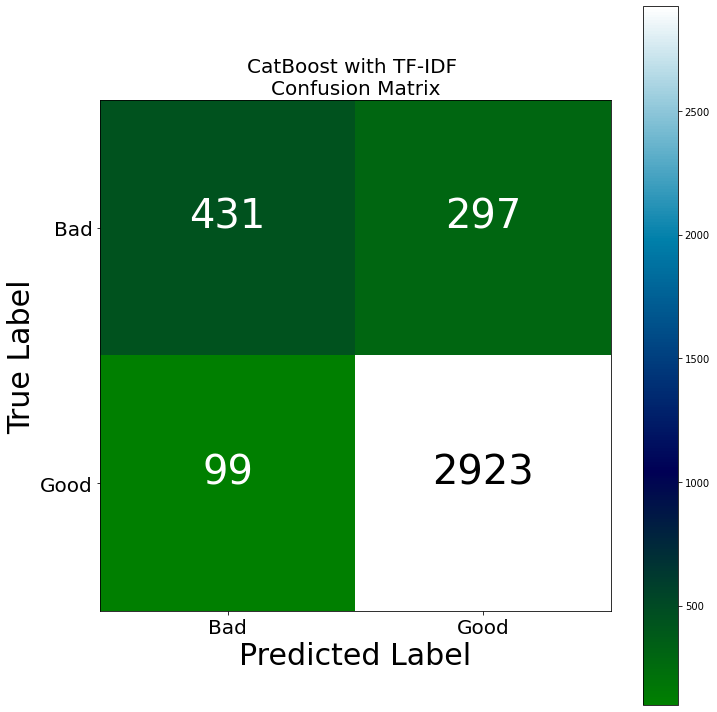

In [62]:
#Confusion Matrix
disp_confusion_matrix(y_pred_tfidf_catboost, "CatBoost", "TF-IDF")

<b>Comparision of Models with TF-IDF Vectorizer</b>

In [63]:
comparison_table(y_preds = [y_pred_tfidf_logreg, y_pred_tfidf_rf, y_pred_tfidf_nb, y_pred_tfidf_xgb, y_pred_tfidf_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [64]:
print('\nComparision Matrix of Models with TF-IDF Vectorizer\n')
df_tv2


Comparision Matrix of Models with TF-IDF Vectorizer



precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.862133 bad       0.601540  0.858516  0.707414   
                                  good      0.962007  0.863005  0.909820   
                                  average   0.892028  0.862133  0.870526   
           Random Forest 0.845067 bad       0.986755  0.204670  0.339022   
                                  good      0.839122  0.999338  0.912249   
                                  average   0.867782  0.845067  0.800966   
           Naive Bayes   0.806133 bad       1.000000  0.001374  0.002743   
                                  good      0.806082  1.000000  0.892630   
                                  average   0.843728  0.806133  0.719874   
           XGBoost       0.900000 bad       0.848126  0.590659  0.696356   
                                  good      0.908110  0.974520  0.940144   
                                  average   0.896465  0.900000  0.892816   
           CatBoost      0.894400 bad       0.813208  0.592033  0.685215   
                                  good      0.907764  0.967240  0.936559   
                                  average   0.889407  0.894400  0.887765   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.862133 bad        728.0  
                                  good      3022.0  
                                  average   3750.0  
           Random Forest 0.845067 bad        728.0  
                                  good      3022.0  
                                  average   3750.0  
           Naive Bayes   0.806133 bad        728.0  
                                  good      3022.0  
                                  average   3750.0  
           XGBoost       0.900000 bad        728.0  
                                  good      3022.0  
                                  average   3750.0  
           CatBoost      0.894400 bad        728.0  
                                  good      3022.0  
                                  average   3750.0

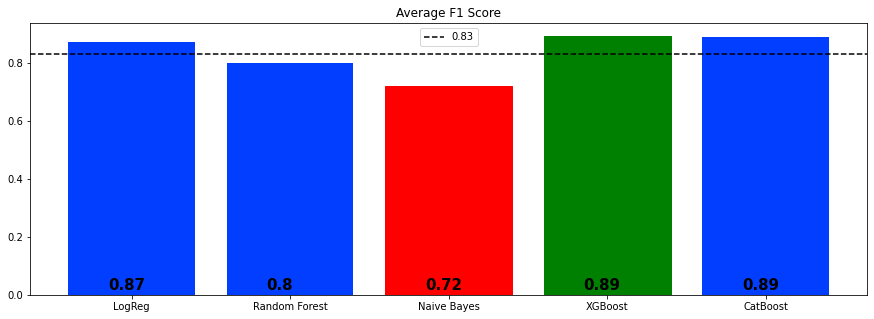

In [67]:
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")

<b>Hashing vectorizer</b>

In [72]:
# Create the word vector with Hash Vectorizer
hash_vect = HashingVectorizer(n_features=2000, ngram_range=(1,1), alternate_sign=False)
hash_vect_train = hash_vect.fit_transform(X_train)
hash_vect_train = hash_vect_train.toarray()
hash_vect_test = hash_vect.transform(X_test)
hash_vect_test = hash_vect_test.toarray()

Model 1: <br/>
Logistic Regression with Hash Vectorizer

In [73]:
# Call the modeling function for logistic regression with Hash Vectorizer and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            hash_vect_train, hash_vect_test)
# Assign y_pred to a variable for further process
y_pred_hash_logreg = y_pred

f1 score: 0.8442673914670208


In [74]:
#Classification Report
print(classification_report(y_test, y_pred_hash_logreg))

              precision    recall  f1-score   support

           0       0.55      0.82      0.66       728
           1       0.95      0.84      0.89      3022

    accuracy                           0.83      3750
   macro avg       0.75      0.83      0.77      3750
weighted avg       0.87      0.83      0.84      3750



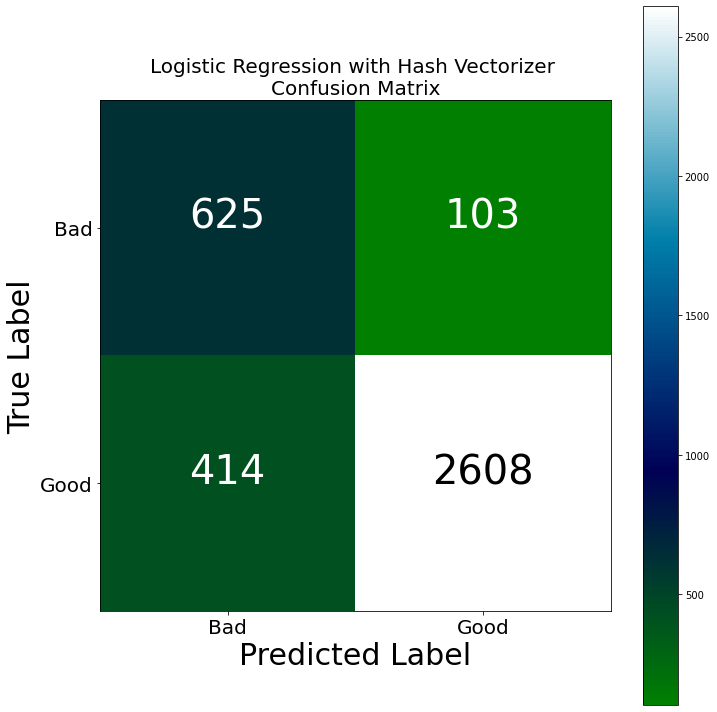

In [75]:
#Confusion Matrix
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "Hash Vectorizer")

Model 2: <br/>
Random Forest with Hash Vectorizer

In [76]:
# Call the modeling function for random forest classifier with Hash Vectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         hash_vect_train, hash_vect_test)
# Assign y_pred to a variable for further process
y_pred_hash_rf = y_pred

f1 score: 0.8208230345888875


In [77]:
#Classification Report
print(classification_report(y_test, y_pred_hash_rf))

              precision    recall  f1-score   support

           0       0.95      0.27      0.42       728
           1       0.85      1.00      0.92      3022

    accuracy                           0.86      3750
   macro avg       0.90      0.63      0.67      3750
weighted avg       0.87      0.86      0.82      3750



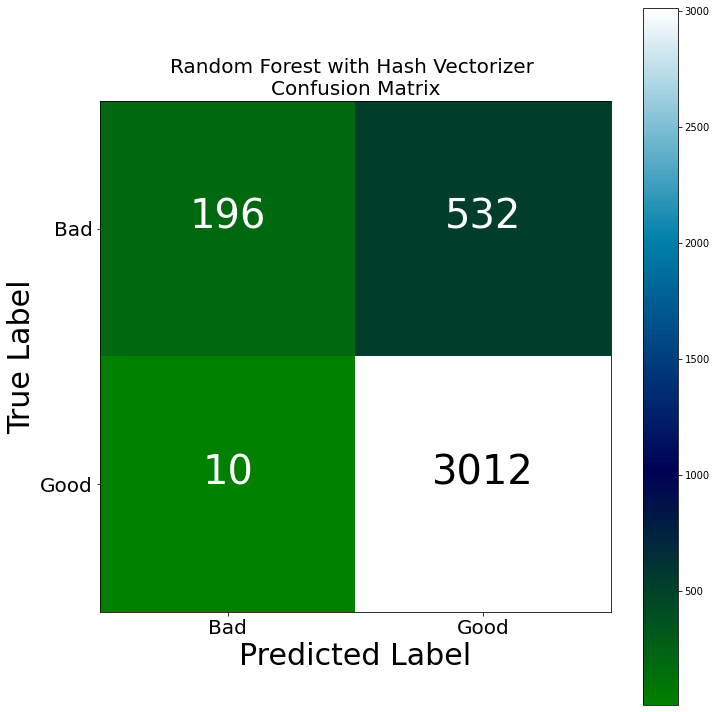

In [78]:
#Confusion Matrix
disp_confusion_matrix(y_pred_hash_rf, "Random Forest", "Hash Vectorizer")

Model 3: <br/>
Naive Bayes with Hash Vectorizer

In [79]:
#Modeling function for naive bayes with Hash Vectorizer
modeling(MultinomialNB(), hash_vect_train, hash_vect_test)
# Assign y_pred to a variable for further process
y_pred_hash_nb = y_pred

f1 score: 0.740160882607882


In [80]:
#Classification Report
print(classification_report(y_test, y_pred_hash_nb))

              precision    recall  f1-score   support

           0       0.90      0.05      0.09       728
           1       0.81      1.00      0.90      3022

    accuracy                           0.81      3750
   macro avg       0.86      0.52      0.49      3750
weighted avg       0.83      0.81      0.74      3750



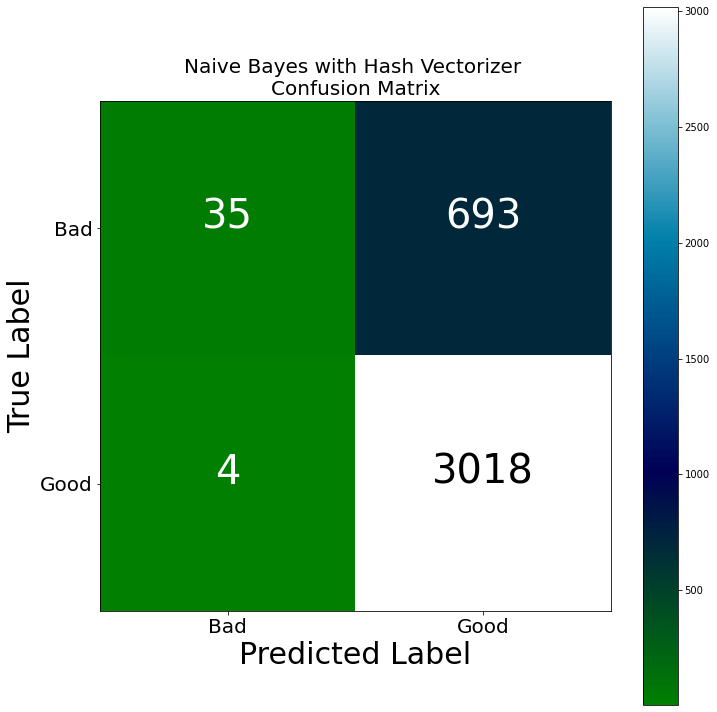

In [81]:
#Confusion Matrix
disp_confusion_matrix(y_pred_hash_nb, "Naive Bayes", "Hash Vectorizer")

Model 4: <br/>
XGBoost with Hash Vectorize

In [82]:
# Modeling function for XGBoost with Hash Vectorizer
modeling(XGBClassifier(), hash_vect_train, hash_vect_test)
# Assign y_pred to a variable for further process
y_pred_hash_xgb = y_pred

f1 score: 0.8869306002306468


In [83]:
#Classification Report
print(classification_report(y_test, y_pred_hash_xgb))

              precision    recall  f1-score   support

           0       0.83      0.57      0.68       728
           1       0.90      0.97      0.94      3022

    accuracy                           0.89      3750
   macro avg       0.87      0.77      0.81      3750
weighted avg       0.89      0.89      0.89      3750



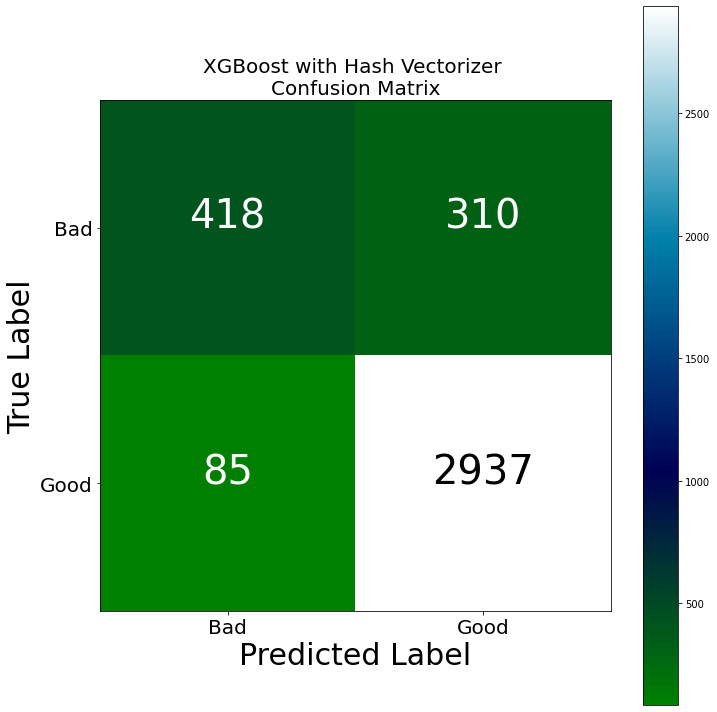

In [84]:
#Confusion Matrix
disp_confusion_matrix(y_pred_hash_xgb, "XGBoost", "Hash Vectorizer")

Model 5: <br/>
Catboost with Hash Vectorize

In [85]:
# Modeling function for Catboost with Hash Vectorizer 
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, depth=2, 
                            loss_function='Logloss'), hash_vect_train, hash_vect_test)
# Assign y_pred to a variable for further process
y_pred_hash_catboost = y_pred

0:	learn: 0.4488447	total: 15.7ms	remaining: 1.55s
1:	learn: 0.4229876	total: 31.2ms	remaining: 1.53s
2:	learn: 0.4029648	total: 45.2ms	remaining: 1.46s
3:	learn: 0.3901213	total: 59.6ms	remaining: 1.43s
4:	learn: 0.3759995	total: 73.7ms	remaining: 1.4s
5:	learn: 0.3661162	total: 85.3ms	remaining: 1.34s
6:	learn: 0.3563142	total: 97.3ms	remaining: 1.29s
7:	learn: 0.3488491	total: 111ms	remaining: 1.28s
8:	learn: 0.3397977	total: 125ms	remaining: 1.27s
9:	learn: 0.3338418	total: 137ms	remaining: 1.23s
10:	learn: 0.3277752	total: 149ms	remaining: 1.21s
11:	learn: 0.3214622	total: 162ms	remaining: 1.19s
12:	learn: 0.3155320	total: 176ms	remaining: 1.18s
13:	learn: 0.3095966	total: 189ms	remaining: 1.16s
14:	learn: 0.3034566	total: 200ms	remaining: 1.13s
15:	learn: 0.3003912	total: 213ms	remaining: 1.12s
16:	learn: 0.2965022	total: 228ms	remaining: 1.11s
17:	learn: 0.2903163	total: 243ms	remaining: 1.11s
18:	learn: 0.2851241	total: 261ms	remaining: 1.11s
19:	learn: 0.2820451	total: 276ms	r

In [86]:
#Classification Report
print(classification_report(y_test, y_pred_hash_catboost))

              precision    recall  f1-score   support

           0       0.77      0.58      0.66       728
           1       0.91      0.96      0.93      3022

    accuracy                           0.89      3750
   macro avg       0.84      0.77      0.80      3750
weighted avg       0.88      0.89      0.88      3750



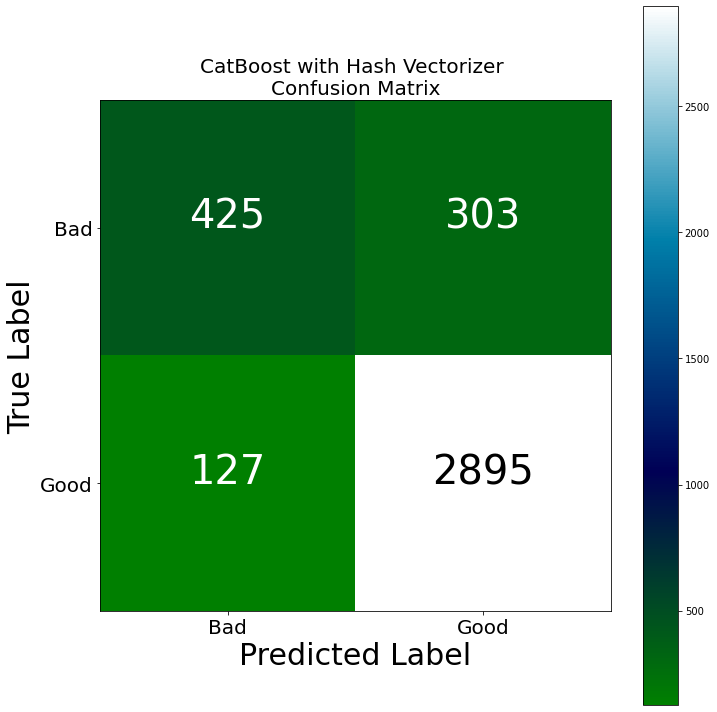

In [87]:
#Confusion Matrix
disp_confusion_matrix(y_pred_hash_catboost, "CatBoost", "Hash Vectorizer")

<b>Comparison of Models with Hash Vectorizer</b>

In [88]:
comparison_table(y_preds = [y_pred_hash_logreg, y_pred_hash_rf, y_pred_hash_nb, y_pred_hash_xgb, y_pred_hash_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [89]:
print('\nComparision Matrix of Models with Hash Vectorizer\n')
df_tv2


Comparision Matrix of Models with Hash Vectorizer



precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.832800 bad       0.546035  0.822802  0.656438   
                                  good      0.951376  0.835208  0.889515   
                                  average   0.872686  0.832800  0.844267   
           Random Forest 0.855467 bad       0.951456  0.269231  0.419700   
                                  good      0.849887  0.996691  0.917454   
                                  average   0.869605  0.855467  0.820823   
           Naive Bayes   0.814133 bad       0.897436  0.048077  0.091265   
                                  good      0.813258  0.998676  0.896480   
                                  average   0.829600  0.814133  0.740161   
           XGBoost       0.894667 bad       0.831014  0.574176  0.679123   
                                  good      0.904527  0.971873  0.936992   
                                  average   0.890256  0.894667  0.886931   
           CatBoost      0.885333 bad       0.769928  0.583791  0.664063   
                                  good      0.905253  0.957975  0.930868   
                                  average   0.878982  0.885333  0.879072   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.832800 bad        728.0  
                                  good      3022.0  
                                  average   3750.0  
           Random Forest 0.855467 bad        728.0  
                                  good      3022.0  
                                  average   3750.0  
           Naive Bayes   0.814133 bad        728.0  
                                  good      3022.0  
                                  average   3750.0  
           XGBoost       0.894667 bad        728.0  
                                  good      3022.0  
                                  average   3750.0  
           CatBoost      0.885333 bad        728.0  
                                  good      3022.0  
                                  average   3750.0

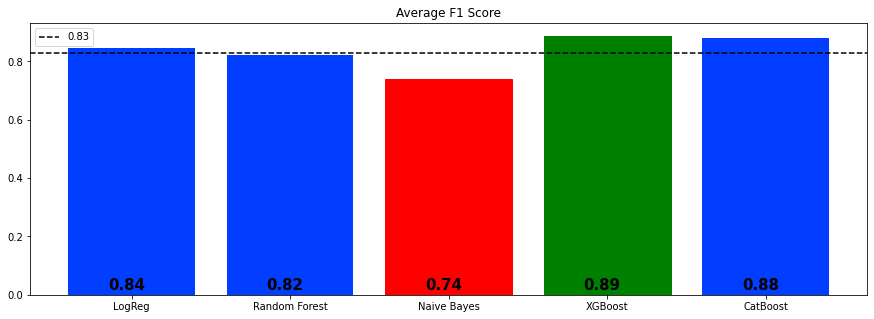

In [90]:
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")